In [1]:
from pathlib import Path
import ark
import scanpy as sc
import spatialdata as sd
import spatialdata_plot
import squidpy as sq

/Users/srivarra/.pyenv/versions/3.11.4/envs/ark-spatial/lib/python3.11/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/Users/srivarra/.pyenv/versions/3.11.4/envs/ark-spatial/lib/python3.11/site-packages/spatialdata/__init__.py:9: UserWarning: Geopandas was set to use PyGEOS, changing to shapely 2.0 with:

	geopandas.options.use_pygeos = True

If you intended to use PyGEOS, set the option to False.
  _check_geopandas_using_shapely()
/Users/srivarra/.pyenv/versions/3.11.4/envs/ark-spatial/lib/python3.11/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 57766 instead
  warnings.warn(
/Users/srivarra/.pyenv/versions/3.11.4/envs/ark-spatial/lib/python3.11/site-packages/dask/config.py:694: UserWar

Load the data

In [2]:
sdata = sd.read_zarr("../../data/cohorts/example_cohort.ome.zarr/")

/Users/srivarra/.pyenv/versions/3.11.4/envs/ark-spatial/lib/python3.11/site-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [3]:
sdata

SpatialData object with:
├── Images
│     ├── 'fov0': SpatialImage[cyx] (22, 512, 512)
│     ├── 'fov1': SpatialImage[cyx] (22, 1024, 1024)
│     ├── 'fov2': SpatialImage[cyx] (22, 1024, 1024)
│     ├── 'fov3': SpatialImage[cyx] (22, 1024, 1024)
│     ├── 'fov4': SpatialImage[cyx] (22, 1024, 1024)
│     ├── 'fov5': SpatialImage[cyx] (22, 1024, 1024)
│     ├── 'fov6': SpatialImage[cyx] (22, 1024, 1024)
│     ├── 'fov7': SpatialImage[cyx] (22, 1024, 1024)
│     ├── 'fov8': SpatialImage[cyx] (22, 1024, 1024)
│     ├── 'fov9': SpatialImage[cyx] (22, 1024, 1024)
│     └── 'fov10': SpatialImage[cyx] (22, 1024, 1024)
├── Labels
│     ├── 'fov0_nuclear': SpatialImage[yx] (512, 512)
│     ├── 'fov0_whole_cell': SpatialImage[yx] (512, 512)
│     ├── 'fov1_nuclear': SpatialImage[yx] (1024, 1024)
│     ├── 'fov1_whole_cell': SpatialImage[yx] (1024, 1024)
│     ├── 'fov2_nuclear': SpatialImage[yx] (1024, 1024)
│     ├── 'fov2_whole_cell': SpatialImage[yx] (1024, 1024)
│     ├── 'fov3_nuclear': Spat

Compute the nearest neighbors graph for `fov0`

In [17]:
fov0_sd = sdata.sel("fov0")
fov0_sd

/Users/srivarra/.pyenv/versions/3.11.4/envs/ark-spatial/lib/python3.11/site-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


SpatialData object with:
├── Images
│     └── 'fov0': SpatialImage[cyx] (22, 512, 512)
├── Labels
│     ├── 'fov0_nuclear': SpatialImage[yx] (512, 512)
│     └── 'fov0_whole_cell': SpatialImage[yx] (512, 512)
└── Table
      └── AnnData object with n_obs × n_vars = 1056 × 22
    obs: 'equivalent_diameter', 'axis_major_length', 'instance_id', 'area', 'eccentricity', 'area_convex', 'x_centroid', 'y_centroid', 'axis_minor_length', 'perimeter', 'major_minor_axis_ratio', 'perim_square_over_area', 'major_axis_equiv_diam_ratio', 'convex_hull_equiv_diam_ratio', 'centroid_dif', 'num_concavities', 'region'
    uns: 'spatialdata_attrs'
    obsm: 'spatial': AnnData (1056, 22)
with coordinate systems:
▸ 'fov0', with elements:
        fov0 (Images), fov0_nuclear (Labels), fov0_whole_cell (Labels)
▸ 'global', with elements:
        fov0 (Images)

In [5]:
sq.gr.spatial_neighbors(fov0_sd)

In [6]:
sc.pp.pca(fov0_sd.table)
sc.pp.neighbors(fov0_sd.table)
sc.tl.leiden(fov0_sd.table)

/Users/srivarra/.pyenv/versions/3.11.4/envs/ark-spatial/lib/python3.11/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/srivarra/.pyenv/versions/3.11.4/envs/ark-spatial/lib/python3.11/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/srivarra/.pyenv/versi

  0%|          | 0/1000 [00:00<?, ?/s]

/Users/srivarra/.pyenv/versions/3.11.4/envs/ark-spatial/lib/python3.11/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/Users/srivarra/.pyenv/versions/3.11.4/envs/ark-spatial/lib/python3.11/site-packages/spatialdata/__init__.py:9: UserWarning: Geopandas was set to use PyGEOS, changing to shapely 2.0 with:

	geopandas.options.use_pygeos = True

If you intended to use PyGEOS, set the option to False.
  _check_geopandas_using_shapely()


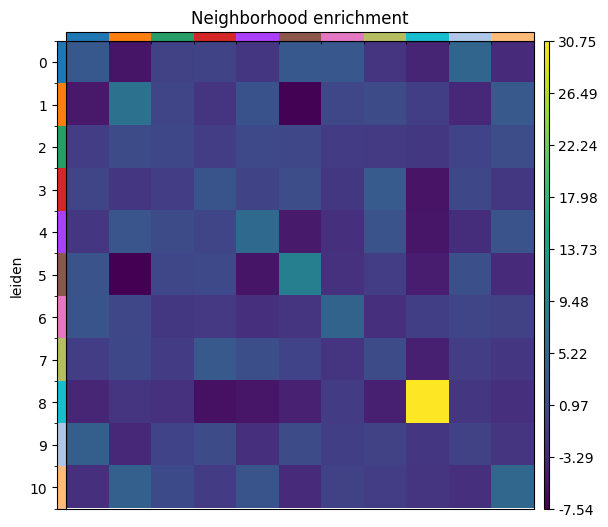

In [8]:
sq.gr.nhood_enrichment(fov0_sd.table, cluster_key="leiden")
sq.pl.nhood_enrichment(fov0_sd.table, cluster_key="leiden", figsize=(5, 5))

INFO     Dropping coordinate system 'global' since it doesn't have relevant elements.                              


ValueError: buffer source array is read-only

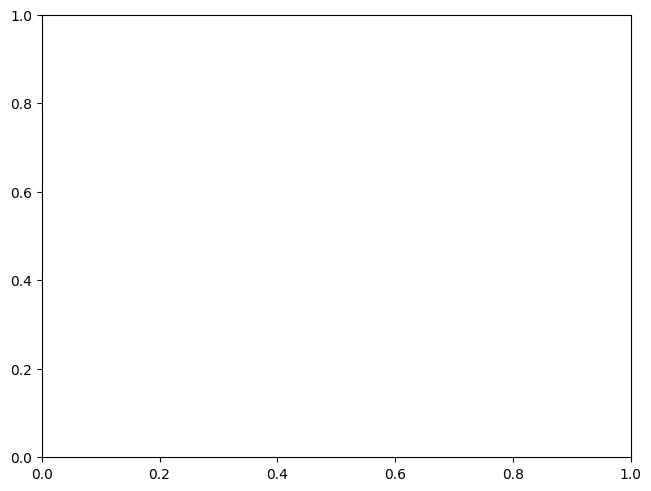

In [13]:
fov0_sd.pl.render_labels(elements="fov0", color="leiden").pl.show()

In [ ]:
fov0_sd.pl.render_images(element="fov0").pl.render_labels(element="fov0_whole_cell", color="leiden").pl.show()